In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
%matplotlib inline
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor # Importing Decision Tree Regressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler,StandardScaler,PolynomialFeatures ## for normalization of data
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,classification_report ## classification report
from matplotlib import pyplot as plt
import seaborn as sns  ## data visualization
from sklearn.metrics import confusion_matrix
from sklearn import tree
from matplotlib import pyplot as plt
import warnings # supress warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import make_pipeline

In [2]:
df1 = pd.read_csv("/content/EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_47.csv")
df2 = pd.read_csv("/content/EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_48.csv")
df3 = pd.read_csv("/content/EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_5.csv")
df4 = pd.read_csv("/content/EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_6.csv")
df5 = pd.read_csv("/content/EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_7.csv")
df6 = pd.read_csv("/content/EyeT_group_dataset_III_image_name_letter_card_participant_11_trial_8.csv")
# merge dataframes
result_df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)

# print result dataframe
print(result_df)
# save result dataframe to a new CSV file
result_df.to_csv("new_file.csv", index=False)

       Unnamed: 0  Recording timestamp  Computer timestamp       Sensor  \
0          504721              4420438          1257645266          NaN   
1          504722              4420438          1257645266          NaN   
2          504723              4425346          1257650174  Eye Tracker   
3          504724              4433677          1257658505  Eye Tracker   
4          504725              4441989          1257666817  Eye Tracker   
...           ...                  ...                 ...          ...   
59780       91477             71347916           671396180          NaN   
59781       91478             71347916           671396180        Mouse   
59782       91479             71352762           671401026  Eye Tracker   
59783       91480             71361167           671409431  Eye Tracker   
59784       91481             71381063           671429327          NaN   

                Project name Export date Participant name Recording name  \
0      Test group exper

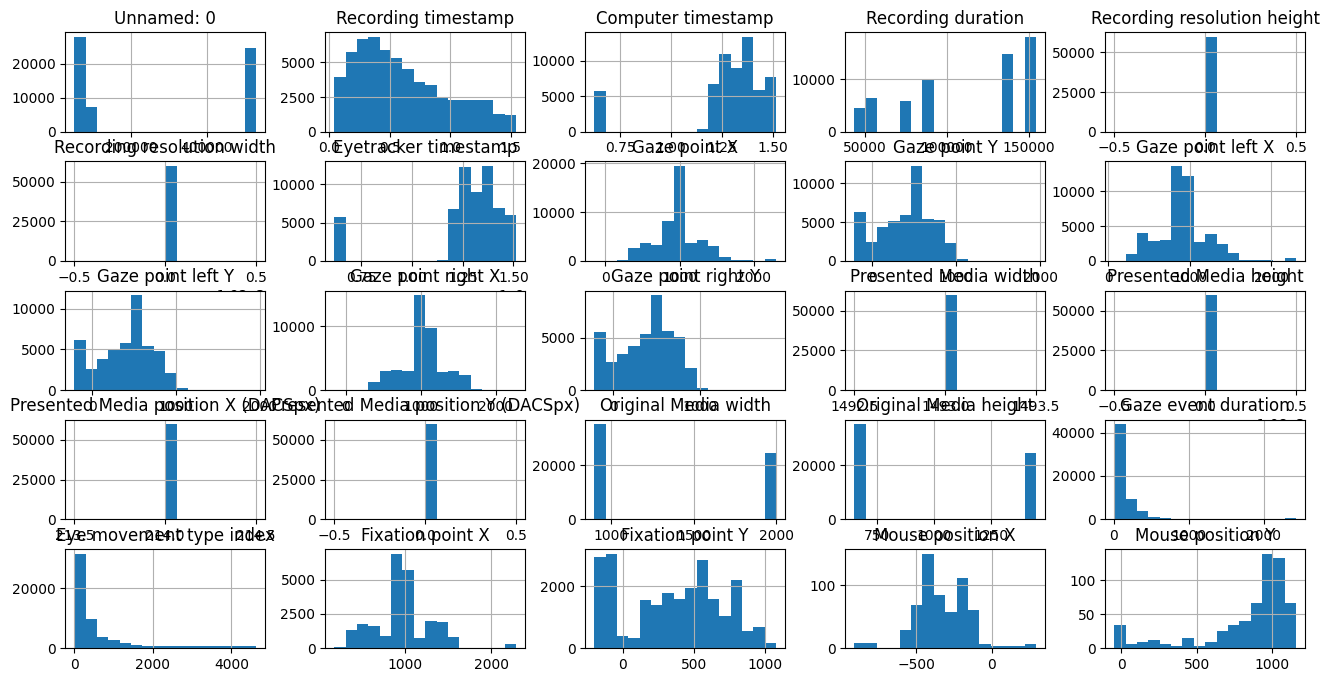

In [3]:
_ = result_df.hist(bins=16, figsize=(16,8))

<Axes: >

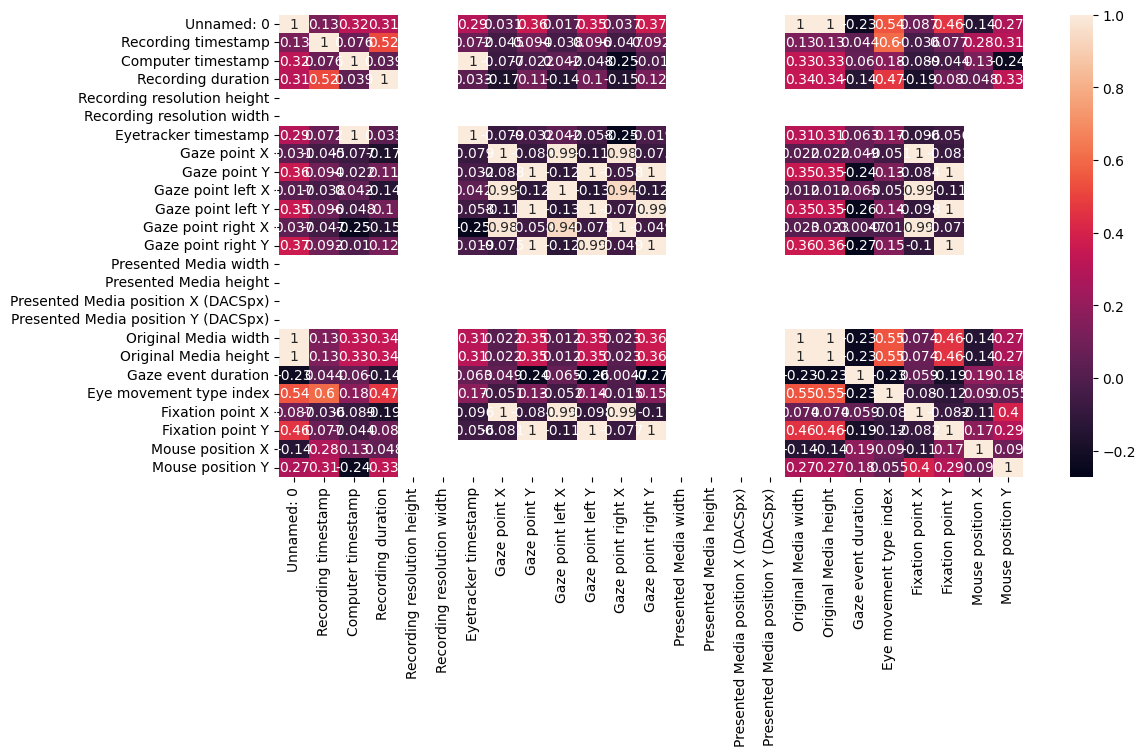

In [4]:
# trend or correlation information simply by using color pairs, and color intensity represent quantity or frequency, especially data that is near -1 or 1, meaning the two are related.
plt.figure(figsize = (12,6,))
data_corr = result_df.corr()
sns.heatmap(data_corr,xticklabels=data_corr.columns,yticklabels=data_corr.columns,annot=True)

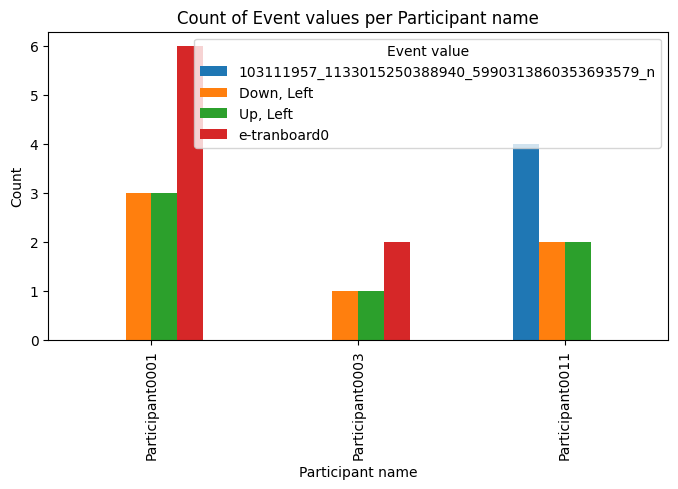

In [9]:
# Group the DataFrame by Participant name and Event value and count the occurrences
event_count = result_df.groupby(['Participant name', 'Event value']).size().reset_index(name='Count')

# Pivot the data to have Participant name as rows and Event value as columns
event_count = event_count.pivot(index='Participant name', columns='Event value', values='Count')

# Plot the counts for each Event value for each Participant name
fig, ax = plt.subplots(figsize=(8, 4))
event_count.plot(kind='bar', ax=ax)
plt.title('Count of Event values per Participant name')
plt.xlabel('Participant name')
plt.ylabel('Count')
plt.show()

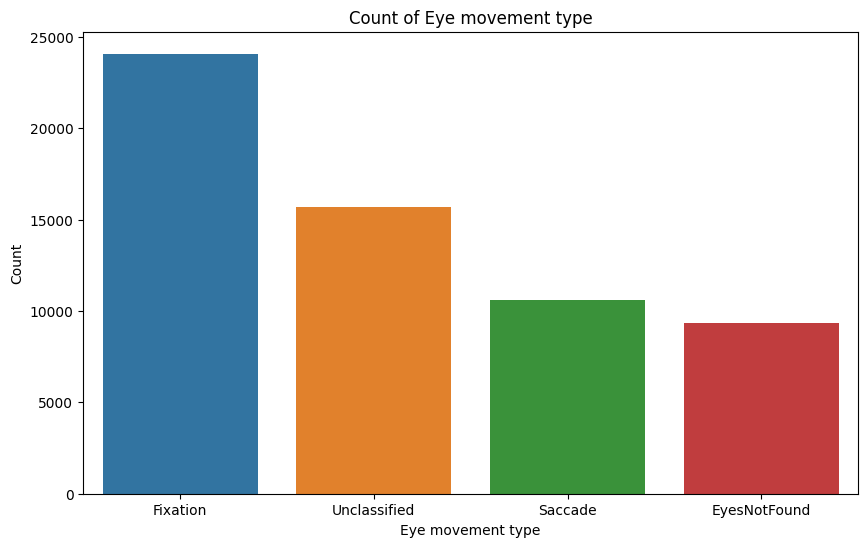

In [10]:
import seaborn as sns

# Get the count of each event
event_counts = result_df['Eye movement type'].value_counts(dropna=False)

# Create a bar plot of the event counts using Seaborn
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=event_counts.index, y=event_counts.values, ax=ax)

# Set the title and axis labels
plt.title('Count of Eye movement type')
plt.xlabel('Eye movement type')
plt.ylabel('Count')

plt.show()

In [ ]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59785 entries, 0 to 59784
Data columns (total 71 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           59785 non-null  int64  
 1   Recording timestamp                  59785 non-null  int64  
 2   Computer timestamp                   59785 non-null  int64  
 3   Sensor                               59755 non-null  object 
 4   Project name                         59785 non-null  object 
 5   Export date                          59785 non-null  object 
 6   Participant name                     59785 non-null  object 
 7   Recording name                       59785 non-null  object 
 8   Recording date                       59785 non-null  object 
 9   Recording date UTC                   59785 non-null  object 
 10  Recording start time                 59785 non-null  object 
 11  Recording start time UTC    

In [ ]:
result_df.head()

,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,...,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y
0,504721,4420438,1257645266,NaN,Test group experiment,29.10.2020,Participant0011,Recording48,29.10.2020,29.10.2020,...,NaN,Fixation,217.0,12.0,253.0,1029.0,"0,0265","0,9526",NaN,NaN
1,504722,4420438,1257645266,NaN,Test group experiment,29.10.2020,Participant0011,Recording48,29.10.2020,29.10.2020,...,NaN,Fixation,217.0,12.0,253.0,1029.0,"0,0265","0,9526",NaN,NaN
2,504723,4425346,1257650174,Eye Tracker,Test group experiment,29.10.2020,Participant0011,Recording48,29.10.2020,29.10.2020,...,1447.0,Fixation,217.0,12.0,253.0,1029.0,"0,0265","0,9526",NaN,NaN
3,504724,4433677,1257658505,Eye Tracker,Test group experiment,29.10.2020,Participant0011,Recording48,29.10.2020,29.10.2020,...,1447.0,Fixation,217.0,12.0,253.0,1029.0,"0,0265","0,9526",NaN,NaN
4,504725,4441989,1257666817,Eye Tracker,Test group experiment,29.10.2020,Participant0011,Recording48,29.10.2020,29.10.2020,...,1447.0,Fixation,217.0,12.0,253.0,1029.0,"0,0265","0,9526",NaN,NaN


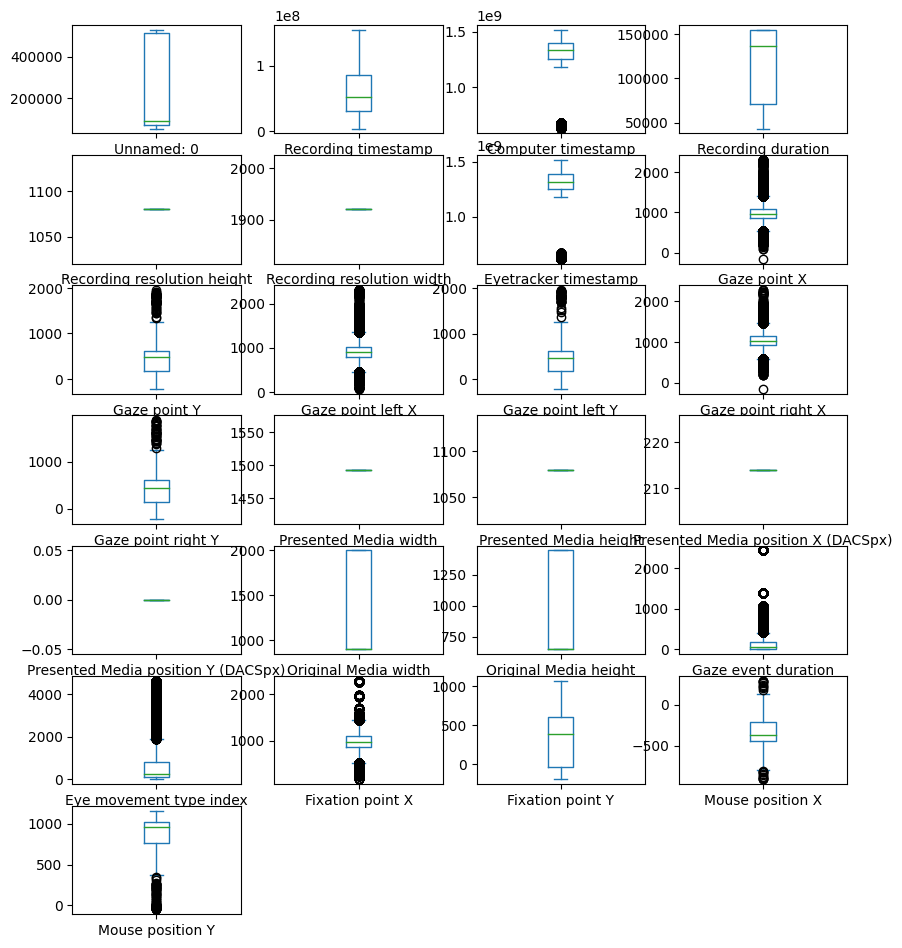

In [6]:
# show box plot to find outlier
result_df.plot(kind='box', subplots=True, figsize=(10, 20),layout=(12,4))
plt.show()

In [ ]:
# filling missing value using fillna()  
result_df.fillna(0)

,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,...,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y
0,504721,4420438,1257645266,0,Test group experiment,29.10.2020,Participant0011,Recording48,29.10.2020,29.10.2020,...,0.0,Fixation,217.0,12.0,253.0,1029.0,"0,0265","0,9526",0.0,0.0
1,504722,4420438,1257645266,0,Test group experiment,29.10.2020,Participant0011,Recording48,29.10.2020,29.10.2020,...,0.0,Fixation,217.0,12.0,253.0,1029.0,"0,0265","0,9526",0.0,0.0
2,504723,4425346,1257650174,Eye Tracker,Test group experiment,29.10.2020,Participant0011,Recording48,29.10.2020,29.10.2020,...,1447.0,Fixation,217.0,12.0,253.0,1029.0,"0,0265","0,9526",0.0,0.0
3,504724,4433677,1257658505,Eye Tracker,Test group experiment,29.10.2020,Participant0011,Recording48,29.10.2020,29.10.2020,...,1447.0,Fixation,217.0,12.0,253.0,1029.0,"0,0265","0,9526",0.0,0.0
4,504725,4441989,1257666817,Eye Tracker,Test group experiment,29.10.2020,Participant0011,Recording48,29.10.2020,29.10.2020,...,1447.0,Fixation,217.0,12.0,253.0,1029.0,"0,0265","0,9526",0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59780,91477,71347916,671396180,0,Test group experiment,29.10.2020,Participant0003,Recording9,01.10.2020,01.10.2020,...,0.0,Fixation,83.0,202.0,1988.0,497.0,0,0,0.0,0.0
59781,91478,71347916,671396180,Mouse,Test group experiment,29.10.2020,Participant0003,Recording9,01.10.2020,01.10.2020,...,649.0,Fixation,83.0,202.0,1988.0,497.0,0,0,-210.0,982.0
59782,91479,71352762,671401026,Eye Tracker,Test group experiment,29.10.2020,Participant0003,Recording9,01.10.2020,01.10.2020,...,649.0,Fixation,83.0,202.0,1988.0,497.0,0,0,0.0,0.0
59783,91480,71361167,671409431,Eye Tracker,Test group experiment,29.10.2020,Participant0003,Recording9,01.10.2020,01.10.2020,...,649.0,Fixation,83.0,202.0,1988.0,497.0,0,0,0.0,0.0


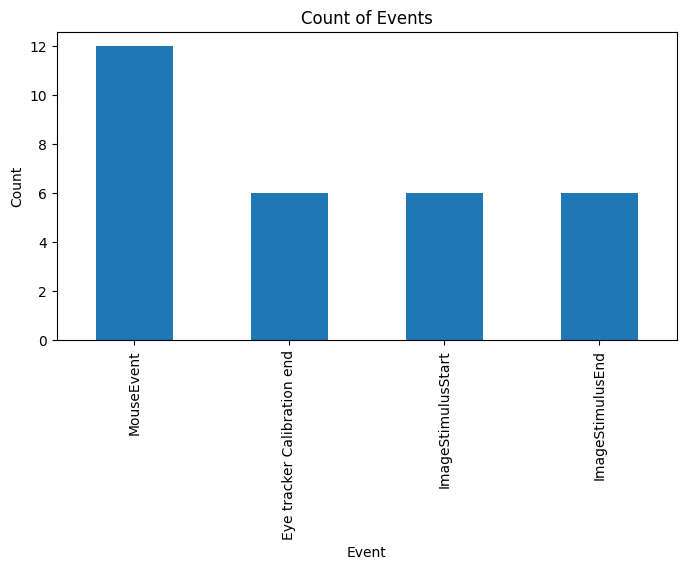

In [8]:
import matplotlib.pyplot as plt

# Get the count of each event
event_counts = result_df['Event'].value_counts()

# Create a bar plot of the event counts
fig, ax = plt.subplots(figsize=(8, 4))
event_counts.plot(kind='bar', ax=ax)

# Set the title and axis labels
plt.title('Count of Events')
plt.xlabel('Event')
plt.ylabel('Count')

plt.show()

In [ ]:
result_df = result_df.drop(['Event','Event value','Mouse position X','Mouse position Y'], axis=1) ### droping the features which are having more   null values

In [ ]:
### splitting the dataset
X = result_df.drop(['Eye movement type'],axis=1)
y = result_df['Eye movement type']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=50) ## splitting into traning and testing

(148867, 71) (148867,)
Feature: 0, Score: 0.00021
Feature: 1, Score: 0.00021
Feature: 2, Score: 0.40418
Feature: 3, Score: 0.00023
Feature: 4, Score: 0.00024
Feature: 5, Score: 0.00021
Feature: 6, Score: 0.00022
Feature: 7, Score: 0.00021
Feature: 8, Score: 0.00021
Feature: 9, Score: 0.00020
Feature: 10, Score: 0.00020
Feature: 11, Score: 0.00022
Feature: 12, Score: 0.00024
Feature: 13, Score: 0.00023
Feature: 14, Score: 0.00020
Feature: 15, Score: 0.00022
Feature: 16, Score: 0.00021
Feature: 17, Score: 0.00024
Feature: 18, Score: 0.00023
Feature: 19, Score: 0.00020
Feature: 20, Score: 0.00021
Feature: 21, Score: 0.00023
Feature: 22, Score: 0.00022
Feature: 23, Score: 0.00023
Feature: 24, Score: 0.00020
Feature: 25, Score: 0.00024
Feature: 26, Score: 0.00022
Feature: 27, Score: 0.00020
Feature: 28, Score: 0.00022
Feature: 29, Score: 0.00021
Feature: 30, Score: 0.00020
Feature: 31, Score: 0.00020
Feature: 32, Score: 0.00021
Feature: 33, Score: 0.23052
Feature: 34, Score: 0.00021
Feature

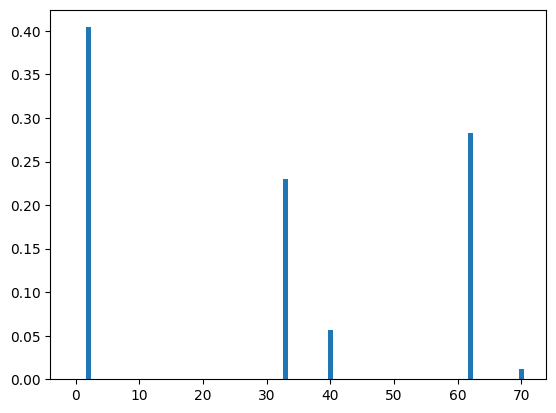

In [ ]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# define dataset
X, y = make_regression(n_samples=148867, n_features=71, n_informative=5, random_state=1)

# summarize the dataset
print(X.shape, y.shape)

model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
control_group1 = pd.read_csv("/content/EyeT_group_dataset_II_image_name_grey_orange_participant_52_trial_1.csv")
control_group2 = pd.read_csv("/content/EyeT_group_dataset_II_image_name_grey_orange_participant_52_trial_3.csv")
control_group3 = pd.read_csv("/content/EyeT_group_dataset_II_image_name_grey_orange_participant_60_trial_1.csv")
control_group4 = pd.read_csv("/content/EyeT_group_dataset_II_image_name_grey_orange_participant_60_trial_3.csv")
# merge dataframes
control_group = pd.concat([control_group1,control_group2,control_group3,control_group4], ignore_index=True)

# print result dataframe
print(control_group)

       Unnamed: 0  Recording timestamp  Computer timestamp       Sensor  \
0            8423              4850201        605982057589          NaN   
1            8424              4850201        605982057589          NaN   
2            8425              4853448        605982060836  Eye Tracker   
3            8426              4861789        605982069177  Eye Tracker   
4            8427              4870116        605982077504  Eye Tracker   
...           ...                  ...                 ...          ...   
28969       31731             65940337       1666203561855          NaN   
28970       31732             65945534       1666203567052  Eye Tracker   
28971       31733             65953860       1666203575378  Eye Tracker   
28972       31734             65962157       1666203583675  Eye Tracker   
28973       31735             65970492       1666203592010  Eye Tracker   

          Project name Export date Participant name Recording name  \
0      Participant0052  08.09

In [ ]:
result_df['Project name']='Test group experiment'
control_group['Project name']='Control group experiment'
print('The member of project name in test group experiment are',result_df['Project name'].unique())
print('The member of project name in control group experiment are',control_group['Project name'].unique())

The member of project name in test group experiment are ['Test group experiment']
The member of project name in control group experiment are ['Control group experiment']


In [ ]:
df4=pd.concat([result_df,control_group])

In [ ]:
pupil=df4[['Participant name','Recording name','Pupil diameter right','Pupil diameter left']].dropna().replace(',', '.', regex=True).replace("0.00", np.NaN)



pupil.iloc[:,2:]=pupil.iloc[:,2:].astype(float)
pupil.set_index(['Participant name', 'Recording name'], inplace=True)

In [ ]:
#find the different of pupil diameter
diff_pupil = pupil.diff()

diff_pupil.iloc[0]=0

diff_pupil.reset_index()

#Absolute the each different value for find only the change value
diff_pupil[['Pupil diameter right','Pupil diameter left']]=abs(diff_pupil[['Pupil diameter right','Pupil diameter left']])

In [ ]:
#find mean of the differece of pupil diameter

diff_pupil_mean=diff_pupil[['Pupil diameter right','Pupil diameter left']].groupby(['Participant name','Recording name']).mean()

diff_pupil_mean.rename(columns={'Pupil diameter right':'mean diff rt.pupil','Pupil diameter left':'mean diff lt.pupil'},inplace=True)
diff_pupil_mean.rename

<bound method DataFrame.rename of                                  mean diff rt.pupil  mean diff lt.pupil
Participant name Recording name                                        
Participant0001  Recording6                0.077131            0.069474
                 Recording7                0.068975            0.060100
                 Recording8                0.094078            0.058449
Participant0003  Recording9                0.086561            0.104546
Participant0011  Recording48               0.481808            0.483785
                 Recording49               0.312075            0.446604
Participant0052  Recording2                0.099521            0.128944
                 Recording4                0.096088            0.109351
Participant0060  Recording2                0.039602            0.032798
                 Recording4                0.063589            0.048729>

In [ ]:
#find max of the differece of pupil diameter

diff_pupil_max=diff_pupil[['Pupil diameter right','Pupil diameter left']].groupby(['Participant name','Recording name']).max()
diff_pupil_max.rename(columns={'Pupil diameter right':'max diff rt.pupil','Pupil diameter left':'max diff lt.pupil'},inplace=True)
diff_pupil_max.rename

<bound method DataFrame.rename of                                  max diff rt.pupil  max diff lt.pupil
Participant name Recording name                                      
Participant0001  Recording6                   0.76               0.58
                 Recording7                   0.84               0.87
                 Recording8                   0.99               0.59
Participant0003  Recording9                   0.65               0.82
Participant0011  Recording48                  3.43               2.40
                 Recording49                  1.81               2.46
Participant0052  Recording2                   0.96               1.48
                 Recording4                   0.92               1.13
Participant0060  Recording2                   0.67               0.57
                 Recording4                   1.23               1.15>

In [ ]:
#find standard deviation of the differece of pupil diameter
diff_pupil_std=diff_pupil[['Pupil diameter right','Pupil diameter left']].groupby(['Participant name','Recording name']).std()
diff_pupil_std.rename(columns={'Pupil diameter right':'std diff rt.pupil','Pupil diameter left':'std diff lt.pupil'},inplace=True)
diff_pupil_std.rename

<bound method DataFrame.rename of                                  std diff rt.pupil  std diff lt.pupil
Participant name Recording name                                      
Participant0001  Recording6               0.071722           0.064156
                 Recording7               0.070558           0.059677
                 Recording8               0.097950           0.051398
Participant0003  Recording9               0.087588           0.095990
Participant0011  Recording48              0.702583           0.497680
                 Recording49              0.357291           0.518369
Participant0052  Recording2               0.132847           0.169040
                 Recording4               0.120988           0.134304
Participant0060  Recording2               0.056563           0.053477
                 Recording4               0.090931           0.088628>

In [ ]:
merged_df_pupil = pd.concat([diff_pupil_mean, diff_pupil_max, diff_pupil_std], axis=1)
merged_df_pupil

mean diff rt.pupil  mean diff lt.pupil  \
Participant name Recording name                                           
Participant0001  Recording6                0.077131            0.069474   
                 Recording7                0.068975            0.060100   
                 Recording8                0.094078            0.058449   
Participant0003  Recording9                0.086561            0.104546   
Participant0011  Recording48               0.481808            0.483785   
                 Recording49               0.312075            0.446604   
Participant0052  Recording2                0.099521            0.128944   
                 Recording4                0.096088            0.109351   
Participant0060  Recording2                0.039602            0.032798   
                 Recording4                0.063589            0.048729   

                                 max diff rt.pupil  max diff lt.pupil  \
Participant name Recording name                                         
Participant0001  Recording6                   0.76               0.58   
                 Recording7                   0.84               0.87   
                 Recording8                   0.99               0.59   
Participant0003  Recording9                   0.65               0.82   
Participant0011  Recording48                  3.43               2.40   
                 Recording49                  1.81               2.46   
Participant0052  Recording2                   0.96               1.48   
                 Recording4                   0.92               1.13   
Participant0060  Recording2                   0.67               0.57   
                 Recording4                   1.23               1.15   

                                 std diff rt.pupil  std diff lt.pupil  
Participant name Recording name                                        
Participant0001  Recording6               0.071722           0.064156  
                 Recording7               0.070558           0.059677  
                 Recording8               0.097950           0.051398  
Participant0003  Recording9               0.087588           0.095990  
Participant0011  Recording48              0.702583           0.497680  
                 Recording49              0.357291           0.518369  
Participant0052  Recording2               0.132847           0.169040  
                 Recording4               0.120988           0.134304  
Participant0060  Recording2               0.056563           0.053477  
                 Recording4               0.090931           0.088628

In [ ]:
eye_movement=df4[['Participant name','Recording name','Eye movement type','Gaze event duration','Event']].set_index(['Participant name','Recording name'])

In [ ]:
#find the fixation duration in each record and participants
fixation_time = []
fixation_duration = []
fixation_index= []
fixation_start = None

for i, eye in eye_movement.iterrows():
    if eye['Eye movement type'] == 'Fixation':
        if fixation_start is None:
            fixation_start = eye['Gaze event duration']
        elif eye['Eye movement type'] != 'Fixation':
            fixation_index.append(i)
            fixation_duration.append(eye['Gaze event duration'])
            fixation_start = eye['Gaze event duration']
    elif fixation_start is not None:
        fixation_time.append(fixation_start)
        fixation_index.append(i)
        fixation_duration.append(eye['Gaze event duration'])
        fixation_start = None
        
if fixation_start is not None:
    fixation_time.append(fixation_start)
    fixation_index.append(i)
    fixation_duration.append(eye['Gaze event duration'])   


fixation=pd.concat([pd.DataFrame(fixation_index).rename(columns={0:'Participant name',1:'Recording name'})
                    ,pd.DataFrame(fixation_duration).rename(columns={0:'Duration'})],axis=1).set_index(['Participant name','Recording name'])


In [ ]:
index=[]
period = []
ptype = None

for i,eye in fixation.iterrows():
    if eye['Duration'] <= 150:
        ptype = 'short'
        period.append(ptype)
        index.append(i)
    elif eye['Duration'] >= 900:
        ptype = 'long'
        period.append(ptype)
        index.append(i)
    else:
        ptype = 'medium'
        period.append(ptype)
        index.append(i)

period=pd.DataFrame(period).rename(columns={0:'Period'})

fixation_period = pd.concat([fixation.reset_index(), period],axis=1)


In [ ]:

#Encoding period 

from sklearn.preprocessing import OneHotEncoder

cat = {'short': 0, 'medium': 1, 'long': 2}

# Convert the categorical variable to numeric codes
fixation_period['Period_codes'] = fixation_period['Period'].map(cat)

# Create an instance of the OneHotEncoder class
enc = OneHotEncoder()

# Fit and transform the categorical variable in the DataFrame
encoded_data = enc.fit_transform(fixation_period[['Period_codes']]).toarray()

encode_duration=pd.DataFrame(encoded_data).rename(columns={0:'short',1:'medium',2:'long'})


In [ ]:
encode_duration

,short,medium
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
1758,1.0,0.0
1759,1.0,0.0
1760,1.0,0.0
1761,1.0,0.0


In [ ]:
df = pd.read_csv('new_file.csv')
df

,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,...,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y
0,15267,3879107,1654110044898,NaN,Project0057,20.09.2021,Participant0057,Recording2,20.09.2021,20.09.2021,...,NaN,Fixation,400.0,8.0,1045.0,492.0,"0,5572","0,4554",NaN,NaN
1,15268,3879107,1654110044898,NaN,Project0057,20.09.2021,Participant0057,Recording2,20.09.2021,20.09.2021,...,NaN,Fixation,400.0,8.0,1045.0,492.0,"0,5572","0,4554",NaN,NaN
2,15269,3886891,1654110052682,Eye Tracker,Project0057,20.09.2021,Participant0057,Recording2,20.09.2021,20.09.2021,...,1447.0,Fixation,400.0,8.0,1045.0,492.0,"0,5572","0,4554",NaN,NaN
3,15270,3895195,1654110060986,Eye Tracker,Project0057,20.09.2021,Participant0057,Recording2,20.09.2021,20.09.2021,...,1447.0,Fixation,400.0,8.0,1045.0,492.0,"0,5572","0,4554",NaN,NaN
4,15271,3903526,1654110069317,Eye Tracker,Project0057,20.09.2021,Participant0057,Recording2,20.09.2021,20.09.2021,...,1447.0,Fixation,400.0,8.0,1045.0,492.0,"0,5572","0,4554",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148862,78352,195754878,1834876111497,NaN,Participant0059,22.09.2021,Participant0059,Recording6,22.09.2021,22.09.2021,...,NaN,Fixation,75.0,360.0,895.0,885.0,"0,4565","0,8193",NaN,NaN
148863,78353,195754878,1834876111497,Mouse,Participant0059,22.09.2021,Participant0059,Recording6,22.09.2021,22.09.2021,...,1447.0,Fixation,75.0,360.0,895.0,885.0,"0,4565","0,8193",-423.0,988.0
148864,78354,195760831,1834876117450,Eye Tracker,Participant0059,22.09.2021,Participant0059,Recording6,22.09.2021,22.09.2021,...,1447.0,Fixation,75.0,360.0,895.0,885.0,"0,4565","0,8193",NaN,NaN
148865,78355,195769082,1834876125701,Eye Tracker,Participant0059,22.09.2021,Participant0059,Recording6,22.09.2021,22.09.2021,...,1447.0,Fixation,75.0,360.0,895.0,885.0,"0,4565","0,8193",NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148867 entries, 0 to 148866
Data columns (total 71 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Unnamed: 0                           148867 non-null  int64  
 1   Recording timestamp                  148867 non-null  int64  
 2   Computer timestamp                   148867 non-null  int64  
 3   Sensor                               148771 non-null  object 
 4   Project name                         148867 non-null  object 
 5   Export date                          148867 non-null  object 
 6   Participant name                     148867 non-null  object 
 7   Recording name                       148867 non-null  object 
 8   Recording date                       148867 non-null  object 
 9   Recording date UTC                   148867 non-null  object 
 10  Recording start time                 148867 non-null  object 
 11  Recording sta

In [ ]:
# interpolate the NaN values using linear interpolation
df1 = df.interpolate(method='linear', axis=0)

In [ ]:
df1

,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Project name,Export date,Participant name,Recording name,Recording date,Recording date UTC,...,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y
0,15267,3879107,1654110044898,NaN,Project0057,20.09.2021,Participant0057,Recording2,20.09.2021,20.09.2021,...,NaN,Fixation,400.0,8.0,1045.0,492.0,"0,5572","0,4554",NaN,NaN
1,15268,3879107,1654110044898,NaN,Project0057,20.09.2021,Participant0057,Recording2,20.09.2021,20.09.2021,...,NaN,Fixation,400.0,8.0,1045.0,492.0,"0,5572","0,4554",NaN,NaN
2,15269,3886891,1654110052682,Eye Tracker,Project0057,20.09.2021,Participant0057,Recording2,20.09.2021,20.09.2021,...,1447.0,Fixation,400.0,8.0,1045.0,492.0,"0,5572","0,4554",NaN,NaN
3,15270,3895195,1654110060986,Eye Tracker,Project0057,20.09.2021,Participant0057,Recording2,20.09.2021,20.09.2021,...,1447.0,Fixation,400.0,8.0,1045.0,492.0,"0,5572","0,4554",NaN,NaN
4,15271,3903526,1654110069317,Eye Tracker,Project0057,20.09.2021,Participant0057,Recording2,20.09.2021,20.09.2021,...,1447.0,Fixation,400.0,8.0,1045.0,492.0,"0,5572","0,4554",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148862,78352,195754878,1834876111497,NaN,Participant0059,22.09.2021,Participant0059,Recording6,22.09.2021,22.09.2021,...,1447.0,Fixation,75.0,360.0,895.0,885.0,"0,4565","0,8193",-423.0,988.0
148863,78353,195754878,1834876111497,Mouse,Participant0059,22.09.2021,Participant0059,Recording6,22.09.2021,22.09.2021,...,1447.0,Fixation,75.0,360.0,895.0,885.0,"0,4565","0,8193",-423.0,988.0
148864,78354,195760831,1834876117450,Eye Tracker,Participant0059,22.09.2021,Participant0059,Recording6,22.09.2021,22.09.2021,...,1447.0,Fixation,75.0,360.0,895.0,885.0,"0,4565","0,8193",-423.0,988.0
148865,78355,195769082,1834876125701,Eye Tracker,Participant0059,22.09.2021,Participant0059,Recording6,22.09.2021,22.09.2021,...,1447.0,Fixation,75.0,360.0,895.0,885.0,"0,4565","0,8193",-423.0,988.0


In [ ]:
df1['Project name'].value_counts()

Project0057        83853
Participant0059    65014
Name: Project name, dtype: int64

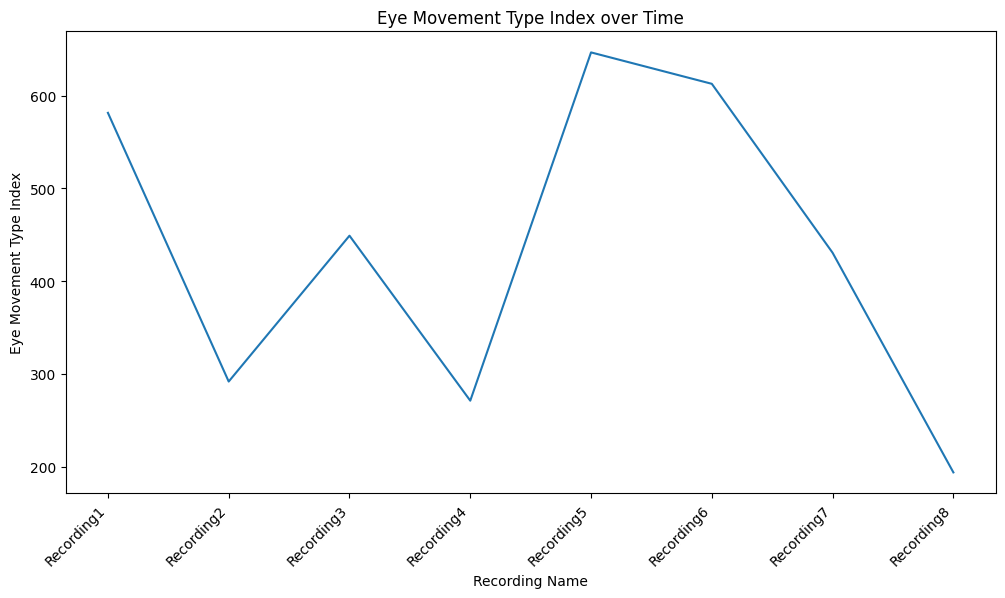

In [ ]:


# Convert Recording date UTC column to datetime format
df1['Recording date'] = pd.to_datetime(df1['Recording date'])

# Group data by Recording name and get mean of Eye movement type index for each recording
grouped_data = df1.groupby('Recording name')['Eye movement type index'].mean()

# Create plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(grouped_data.index, grouped_data.values)

# Set plot title and axis labels
ax.set_title('Eye Movement Type Index over Time')
ax.set_xlabel('Recording Name')
ax.set_ylabel('Eye Movement Type Index')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

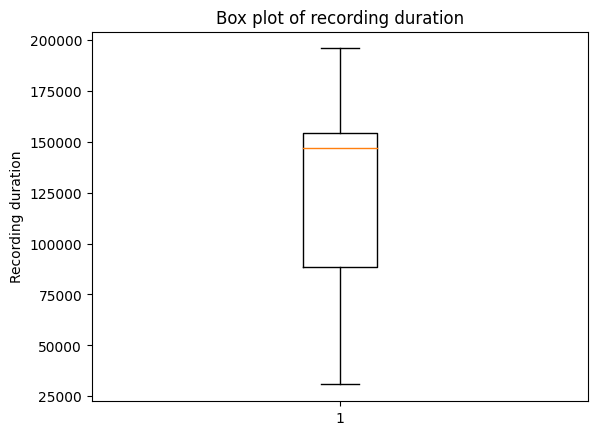

In [ ]:
# Create a box plot of the `Recording duration` column
plt.boxplot(df1['Recording duration'])
plt.ylabel('Recording duration')
plt.title('Box plot of recording duration')
plt.show()

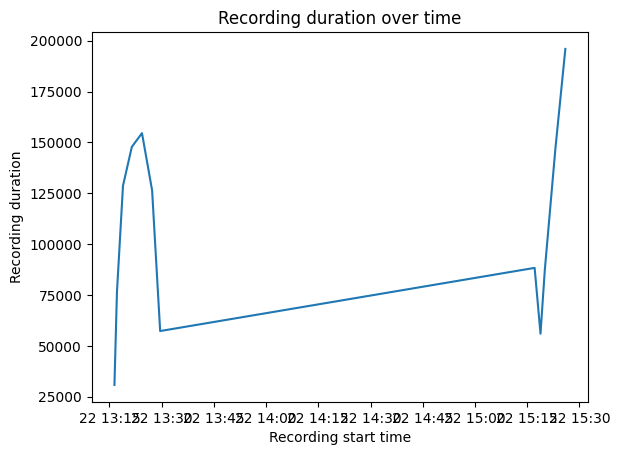

In [ ]:
# Convert the `Recording start time` column to a pandas datetime format
df1['Recording start time'] = pd.to_datetime(df1['Recording start time'])

# Set `Recording start time` as the dataframe index
df1.set_index('Recording start time', inplace=True)

# Create a time series graph of the `Recording duration` column
plt.plot(df1['Recording duration'])
plt.xlabel('Recording start time')
plt.ylabel('Recording duration')
plt.title('Recording duration over time')
plt.show()

In [ ]:
df1.describe()

,Unnamed: 0,Recording timestamp,Computer timestamp,Recording duration,Recording resolution height,Recording resolution width,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze point left X,...,Presented Media position X (DACSpx),Presented Media position Y (DACSpx),Original Media width,Original Media height,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Mouse position X,Mouse position Y
count,148867.000000,1.488670e+05,1.488670e+05,148867.000000,148867.0,148867.0,1.488650e+05,148865.000000,148865.000000,148865.000000,...,148865.0,148865.0,148865.0,148865.0,148867.000000,148867.000000,148867.000000,148867.000000,148795.000000,148795.000000
mean,51558.795180,6.758786e+07,1.733149e+12,129898.601644,1080.0,1920.0,2.474136e+09,895.990129,445.048366,779.128039,...,214.0,0.0,2000.0,1447.0,224.674491,413.276307,895.716092,529.356379,-542.960688,900.138745
std,25735.524498,4.375346e+07,8.927948e+10,43336.531153,0.0,0.0,9.738547e+08,277.289675,301.697022,280.241531,...,0.0,0.0,0.0,0.0,270.684553,496.789595,242.226664,228.742159,275.908063,163.248397
min,1609.000000,3.773794e+06,1.654110e+12,30766.000000,1080.0,1920.0,1.022592e+09,21.000000,-216.000000,-113.000000,...,214.0,0.0,2000.0,1447.0,8.000000,4.000000,207.000000,-165.000000,-1565.000000,-6.000000
25%,29182.500000,3.126499e+07,1.654490e+12,88301.000000,1080.0,1920.0,1.475973e+09,701.000000,260.000000,586.617363,...,214.0,0.0,2000.0,1447.0,33.000000,110.000000,728.000000,380.000000,-550.618810,858.000000
50%,52019.000000,5.946619e+07,1.654855e+12,147069.000000,1080.0,1920.0,2.970006e+09,924.000000,489.000000,794.880000,...,214.0,0.0,2000.0,1447.0,142.000000,242.000000,921.000000,562.000000,-411.804146,938.014721
75%,71269.000000,9.857132e+07,1.834539e+12,154541.000000,1080.0,1920.0,3.369086e+09,1075.000000,667.000000,952.000000,...,214.0,0.0,2000.0,1447.0,300.000000,447.000000,1040.986014,683.000000,-387.000000,979.000000
max,102875.000000,1.957961e+08,1.834876e+12,195934.000000,1080.0,1920.0,3.721037e+09,2131.000000,1334.000000,2078.000000,...,214.0,0.0,2000.0,1447.0,1921.000000,2665.000000,1569.000000,987.000000,-135.000000,1230.000000


In [ ]:
# Group the data by the columns you want to keep separate
grouped = df1.groupby(['Project name', 'Recording name', 'Recording date', 'Recording start time'])

# Keep the first value encountered in each group
df1 = grouped.agg('first')

# Reset the index to make the columns ungrouped again
df1.reset_index(inplace=True)
print(df1)

       Project name Recording name Recording date Recording start time  \
0   Participant0059     Recording1     22.09.2021         15:17:07.187   
1   Participant0059     Recording2     22.09.2021         15:18:48.323   
2   Participant0059     Recording3     22.09.2021         15:20:02.873   
3   Participant0059     Recording5     22.09.2021         15:23:05.590   
4   Participant0059     Recording6     22.09.2021         15:25:56.710   
5       Project0057     Recording2     20.09.2021         13:16:26.043   
6       Project0057     Recording3     20.09.2021         13:17:09.113   
7       Project0057     Recording4     20.09.2021         13:18:53.317   
8       Project0057     Recording5     20.09.2021         13:21:25.577   
9       Project0057     Recording6     20.09.2021         13:24:20.477   
10      Project0057     Recording7     20.09.2021         13:27:15.113   
11      Project0057     Recording8     20.09.2021         13:29:33.787   

    Unnamed: 0  Recording timestamp  

In [ ]:
df1.head()

,Project name,Recording name,Recording date,Recording start time,Unnamed: 0,Recording timestamp,Computer timestamp,Sensor,Export date,Participant name,...,Original Media height,Eye movement type,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm),Mouse position X,Mouse position Y
0,Participant0059,Recording1,22.09.2021,15:17:07.187,1609,12532530,1834163640543,Eye Tracker,22.09.2021,Participant0059,...,1447.0,EyesNotFound,75.0,185.0,1094.553571,630.535714,"0,5184","0,3556",-373.733333,1015.533333
1,Participant0059,Recording2,22.09.2021,15:18:48.323,13482,18584896,1834270551469,Eye Tracker,22.09.2021,Participant0059,...,1447.0,Fixation,292.0,25.0,896.000000,400.000000,"0,4572","0,3703",-457.628571,985.085714
2,Participant0059,Recording3,22.09.2021,15:20:02.873,19165,4828444,1834331351791,Eye Tracker,22.09.2021,Participant0059,...,1447.0,Fixation,775.0,10.0,958.000000,409.000000,"0,4988","0,3786",-434.863636,982.545455
3,Participant0059,Recording5,22.09.2021,15:23:05.590,37538,5336716,1834514601253,Eye Tracker,22.09.2021,Participant0059,...,1447.0,EyesNotFound,8.0,74.0,858.382353,603.088235,"0,4295","0,5790",-428.281250,983.531250
4,Participant0059,Recording6,22.09.2021,15:25:56.710,55329,4681389,1834685038008,Eye Tracker,22.09.2021,Participant0059,...,1447.0,Fixation,667.0,10.0,871.000000,451.000000,"0,4403","0,4171",-431.984881,987.986256


In [ ]:
# Replace 'Participant0001' with '1' and 'Participant0059' with '59'
df1['Participant name'] = df1['Participant name'].replace({'Participant0057': '57', 'Participant0059': '59'})

# Print the updated DataFrame
print(df1)

       Project name Recording name Recording date Recording start time  \
0   Participant0059     Recording1     22.09.2021         15:17:07.187   
1   Participant0059     Recording2     22.09.2021         15:18:48.323   
2   Participant0059     Recording3     22.09.2021         15:20:02.873   
3   Participant0059     Recording5     22.09.2021         15:23:05.590   
4   Participant0059     Recording6     22.09.2021         15:25:56.710   
5       Project0057     Recording2     20.09.2021         13:16:26.043   
6       Project0057     Recording3     20.09.2021         13:17:09.113   
7       Project0057     Recording4     20.09.2021         13:18:53.317   
8       Project0057     Recording5     20.09.2021         13:21:25.577   
9       Project0057     Recording6     20.09.2021         13:24:20.477   
10      Project0057     Recording7     20.09.2021         13:27:15.113   
11      Project0057     Recording8     20.09.2021         13:29:33.787   

    Unnamed: 0  Recording timestamp  

In [ ]:
empathy_before = pd.read_csv("/content/Questionnaire_datasetIA.csv",encoding='iso-8859-1', dtype={'Participant0059' : str})
empathy_before

,Participant nr,NR,Created,Modified,I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate,I want to participate.,I sometimes find it difficult to see things from the other guys point of view.,"I am usually objective when I watch a film or play, and I dont often get completely caught up in it.",I try to look at everybodys side of a disagreement before I make a decision.,I sometimes try to understand my friends better by imagining how things look from their perspective.,...,"If someone is suffering from stutter, I prefer speaking rather than texting.",I try to be patient when people speak with me very slowly.,"In a situation, when there are handicapped students in a classroom, the pace of the class should be adapted to the handicapped student.","In a situation, when there are only one handicapped student in a classroom, the pace of the class should be adapted to him/her independently of how many students are in the class.","I feel impatient when people communicate slowly, so I complete other peoples sentences to make the communication more efficient.",I believe that the handicapped students should catch the pace of the group in a classroom to not delay the progress of other students.,I feel left out (or excluded) when I cannot participate in a conversation.,Total Score extended,Total Score original,Elapsed time
0,1,9199452,07.09.2020 15:13,07.09.2020 15:13,Yes,Proceed,3,3,4,4,...,1,4,4,4,1,3,4,134,108,5 minutes 5 seconds
1,2,9584002,30.09.2020 11:23,30.09.2020 11:23,Yes,Proceed,3,3,4,4,...,2,4,3,3,4,2,2,133,105,5 minutes 55 seconds
2,3,9112363,02.09.2020 09:17,02.09.2020 09:17,Yes,Proceed,2,2,3,4,...,3,3,3,3,3,3,3,116,81,6 minutes 49 seconds
3,4,9727754,06.10.2020 13:20,06.10.2020 13:20,Yes,Proceed,2,3,4,3,...,2,3,4,4,2,4,2,114,96,8 minutes 39 seconds
4,5,9730232,06.10.2020 14:53,06.10.2020 14:53,Yes,Proceed,3,3,4,4,...,1,4,2,1,4,4,4,138,106,7 minutes 27 seconds
5,6,9583726,30.09.2020 11:06,30.09.2020 11:06,Yes,Proceed,1,2,4,3,...,1,3,4,3,2,3,3,121,92,9 minutes 39 seconds
6,7,9957250,20.10.2020 14:14,20.10.2020 14:14,Yes,Proceed,2,2,4,4,...,2,3,3,2,4,3,2,127,81,5 minutes 49 seconds
7,8,9151582,04.09.2020 13:46,04.09.2020 13:46,Yes,Proceed,2,2,3,3,...,2,3,4,3,3,2,3,116,86,9 minutes 35 seconds
8,9,10176176,29.10.2020 13:27,29.10.2020 13:27,Yes,Proceed,4,3,2,3,...,4,4,4,1,2,2,2,114,87,7 minutes 45 seconds
9,10,9150442,04.09.2020 12:54,04.09.2020 12:54,Yes,Proceed,1,3,3,3,...,2,2,3,2,2,3,1,117,82,4 minutes 45 seconds


In [ ]:
empathy_after = pd.read_csv("/content/Questionnaire_datasetIB.csv",encoding='iso-8859-1', dtype={'Participant0059' : str})
empathy_after

,Participant nr,NR,Created,Modified,I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate,I want to participate.,I sometimes find it difficult to see things from the ï¿½other guyï¿½sï¿½ point of,"I am usually objective when I watch a film or play, and I donï¿½t often get completely caught up in i",I try to look at everybodyï¿½s side of a disagreement before I make a decisio,I sometimes try to understand my friends better by imagining how things look from their perspective.,...,"If someone is suffering from stutter, I prefer speaking rather than texting.",I try to be patient when people speak with me very slowly.,"In a situation, when there are handicapped students in a classroom, the pace of the class should be adapted to the handicapped student.","In a situation, when there are only one handicapped student in a classroom, the pace of the class should be adapted to him/her independently of how many students are in the class.","I feel impatient when people communicate slowly, so I complete other peopleï¿½s sentences to make the communication more efficien",I believe that the handicapped students should catch the pace of the group in a classroom to not delay the progress of other students.,I feel left out (or excluded) when I cannot participate in a conversation.,Total Score extended,Total Score original,Elapsed time
0,1,9534500,24.09.2020 16:00,24.09.2020 16:00,Yes,Proceed,1,3,4,4,...,1,4,4,4,1,2,4,137,109,5 minutes 5 seconds
1,2,9597659,30.09.2020 15:14,30.09.2020 15:14,Yes,Proceed,2,2,4,4,...,2,4,3,3,4,2,2,127,100,5 minutes 55 seconds
2,3,9637453,01.10.2020 16:20,01.10.2020 16:20,Yes,Proceed,4,1,4,4,...,3,3,3,2,3,3,2,123,98,6 minutes 49 seconds
3,4,9732460,06.10.2020 16:45,06.10.2020 16:45,Yes,Proceed,2,3,3,3,...,2,3,4,3,2,4,2,120,95,8 minutes 39 seconds
4,5,9732853,06.10.2020 17:24,06.10.2020 17:24,Yes,Proceed,2,3,4,3,...,3,4,2,1,4,3,4,124,97,7 minutes 27 seconds
5,6,9742794,07.10.2020 16:23,07.10.2020 16:23,Yes,Proceed,2,2,4,3,...,1,3,4,2,2,3,3,119,95,9 minutes 39 seconds
6,7,9957985,20.10.2020 14:57,20.10.2020 14:57,Yes,Proceed,1,2,2,3,...,2,2,3,2,4,3,3,97,73,5 minutes 49 seconds
7,8,9981681,21.10.2020 14:13,21.10.2020 14:13,Yes,Proceed,1,3,1,3,...,4,2,2,2,1,1,4,98,76,9 minutes 35 seconds
8,9,10176722,29.10.2020 14:01,29.10.2020 14:01,Yes,Proceed,2,2,2,4,...,1,3,2,1,2,3,2,99,78,7 minutes 45 seconds
9,10,10187952,29.10.2020 22:29,29.10.2020 22:29,Yes,Proceed,1,3,3,3,...,2,2,3,3,3,3,3,100,76,4 minutes 45 seconds


In [ ]:
# Replace 'Participant0001' with '1' and 'Participant0059' with '59'
df1['Participant name'] = df1['Participant name'].replace({'Project0057': '57', 'Participant0059': '59'})

# Print the updated DataFrame
print(df1)

       Project name Recording name Recording date Recording start time  \
0   Participant0059     Recording1     22.09.2021         15:17:07.187   
1   Participant0059     Recording2     22.09.2021         15:18:48.323   
2   Participant0059     Recording3     22.09.2021         15:20:02.873   
3   Participant0059     Recording5     22.09.2021         15:23:05.590   
4   Participant0059     Recording6     22.09.2021         15:25:56.710   
5       Project0057     Recording2     20.09.2021         13:16:26.043   
6       Project0057     Recording3     20.09.2021         13:17:09.113   
7       Project0057     Recording4     20.09.2021         13:18:53.317   
8       Project0057     Recording5     20.09.2021         13:21:25.577   
9       Project0057     Recording6     20.09.2021         13:24:20.477   
10      Project0057     Recording7     20.09.2021         13:27:15.113   
11      Project0057     Recording8     20.09.2021         13:29:33.787   

    Unnamed: 0  Recording timestamp  

In [ ]:
# Extract the numerical value from the 'Participant name' column and convert it to an integer
df1['Participant'] = df1['Participant name'].str.extract('(\d+)').astype(int)

# Print the updated DataFrame
print(df1)

       Project name Recording name Recording date Recording start time  \
0   Participant0059     Recording1     22.09.2021         15:17:07.187   
1   Participant0059     Recording2     22.09.2021         15:18:48.323   
2   Participant0059     Recording3     22.09.2021         15:20:02.873   
3   Participant0059     Recording5     22.09.2021         15:23:05.590   
4   Participant0059     Recording6     22.09.2021         15:25:56.710   
5       Project0057     Recording2     20.09.2021         13:16:26.043   
6       Project0057     Recording3     20.09.2021         13:17:09.113   
7       Project0057     Recording4     20.09.2021         13:18:53.317   
8       Project0057     Recording5     20.09.2021         13:21:25.577   
9       Project0057     Recording6     20.09.2021         13:24:20.477   
10      Project0057     Recording7     20.09.2021         13:27:15.113   
11      Project0057     Recording8     20.09.2021         13:29:33.787   

    Unnamed: 0  Recording timestamp  

In [ ]:
# Check the column names and values in the DataFrame
print(df1.columns)
print(df1['Participant'].unique())

# Convert the data type of the 'Participant' column to integer
df1['Participant'] = df1['Participant'].astype(int)

# Remove any leading or trailing whitespaces in the 'Participant' column values
df1['Participant name'] = df1['Participant name'].str.strip()

# Filter the DataFrame to include only rows for Participant 1
participant1_data = df1[df1['Participant'] == 57]

# Print the filtered DataFrame
print(participant1_data)

Index(['Project name', 'Recording name', 'Recording date',
       'Recording start time', 'Unnamed: 0', 'Recording timestamp',
       'Computer timestamp', 'Sensor', 'Export date', 'Participant name',
       'Recording date UTC', 'Recording start time UTC', 'Recording duration',
       'Timeline name', 'Recording Fixation filter name',
       'Recording software version', 'Recording resolution height',
       'Recording resolution width', 'Recording monitor latency',
       'Eyetracker timestamp', 'Event', 'Event value', 'Gaze point X',
       'Gaze point Y', 'Gaze point left X', 'Gaze point left Y',
       'Gaze point right X', 'Gaze point right Y', 'Gaze direction left X',
       'Gaze direction left Y', 'Gaze direction left Z',
       'Gaze direction right X', 'Gaze direction right Y',
       'Gaze direction right Z', 'Pupil diameter left', 'Pupil diameter right',
       'Validity left', 'Validity right', 'Eye position left X (DACSmm)',
       'Eye position left Y (DACSmm)', 'Eye po

In [ ]:
df1.corr()

,Unnamed: 0,Recording timestamp,Computer timestamp,Recording duration,Recording resolution height,Recording resolution width,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze point left X,...,Presented Media position Y (DACSpx),Original Media width,Original Media height,Gaze event duration,Eye movement type index,Fixation point X,Fixation point Y,Mouse position X,Mouse position Y,Participant
Unnamed: 0,1.000000,-0.402573,-0.426236,0.330073,NaN,NaN,0.528063,0.559895,-0.107246,0.427931,...,NaN,NaN,NaN,0.152437,-0.408460,0.083082,-0.380851,0.388909,0.283709,-0.428749
Recording timestamp,-0.402573,1.000000,0.554139,-0.375587,NaN,NaN,-0.463349,-0.431874,0.058690,-0.360278,...,NaN,NaN,NaN,-0.172031,0.463895,-0.203012,0.177736,-0.475667,-0.380922,0.554666
Computer timestamp,-0.426236,0.554139,1.000000,0.124309,NaN,NaN,-0.917288,-0.903225,-0.019522,-0.808067,...,NaN,NaN,NaN,0.067249,0.495154,-0.682179,0.469658,-0.808206,-0.886912,0.999996
Recording duration,0.330073,-0.375587,0.124309,1.000000,NaN,NaN,-0.068502,-0.209764,-0.055441,-0.337055,...,NaN,NaN,NaN,-0.222902,-0.060063,-0.369690,0.127650,0.021328,-0.151890,0.123080
Recording resolution height,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recording resolution width,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Eyetracker timestamp,0.528063,-0.463349,-0.917288,-0.068502,NaN,NaN,1.000000,0.889973,0.275327,0.829108,...,NaN,NaN,NaN,-0.143603,-0.201696,0.812787,-0.293441,0.944398,0.959804,-0.917710
Gaze point X,0.559895,-0.431874,-0.903225,-0.209764,NaN,NaN,0.889973,1.000000,-0.040503,0.918685,...,NaN,NaN,NaN,0.144510,-0.449534,0.703037,-0.546788,0.738098,0.799735,-0.903746
Gaze point Y,-0.107246,0.058690,-0.019522,-0.055441,NaN,NaN,0.275327,-0.040503,1.000000,-0.020101,...,NaN,NaN,NaN,-0.518161,0.624005,0.467153,0.581294,0.525548,0.377366,-0.019189
Gaze point left X,0.427931,-0.360278,-0.808067,-0.337055,NaN,NaN,0.829108,0.918685,-0.020101,1.000000,...,NaN,NaN,NaN,0.218993,-0.316186,0.720434,-0.571220,0.698598,0.778051,-0.808299


In [ ]:
# Merge the before and after empathy scores
empathy_scores = pd.concat([empathy_before, empathy_after])
empathy_scores

,Participant nr,NR,Created,Modified,I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate,I want to participate.,I sometimes find it difficult to see things from the other guys point of view.,"I am usually objective when I watch a film or play, and I dont often get completely caught up in it.",I try to look at everybodys side of a disagreement before I make a decision.,I sometimes try to understand my friends better by imagining how things look from their perspective.,...,I feel left out (or excluded) when I cannot participate in a conversation.,Total Score extended,Total Score original,Elapsed time,I sometimes find it difficult to see things from the ï¿½other guyï¿½sï¿½ point of,"I am usually objective when I watch a film or play, and I donï¿½t often get completely caught up in i",I try to look at everybodyï¿½s side of a disagreement before I make a decisio,"When I am upset at someone, I usually try to ï¿½put myself in his shoes for a whil",I often get emotionally involved with my friendsï¿½ problem,"I feel impatient when people communicate slowly, so I complete other peopleï¿½s sentences to make the communication more efficien"
0,1,9199452,07.09.2020 15:13,07.09.2020 15:13,Yes,Proceed,3.0,3.0,4.0,4,...,4,134,108,5 minutes 5 seconds,NaN,NaN,NaN,NaN,NaN,NaN
1,2,9584002,30.09.2020 11:23,30.09.2020 11:23,Yes,Proceed,3.0,3.0,4.0,4,...,2,133,105,5 minutes 55 seconds,NaN,NaN,NaN,NaN,NaN,NaN
2,3,9112363,02.09.2020 09:17,02.09.2020 09:17,Yes,Proceed,2.0,2.0,3.0,4,...,3,116,81,6 minutes 49 seconds,NaN,NaN,NaN,NaN,NaN,NaN
3,4,9727754,06.10.2020 13:20,06.10.2020 13:20,Yes,Proceed,2.0,3.0,4.0,3,...,2,114,96,8 minutes 39 seconds,NaN,NaN,NaN,NaN,NaN,NaN
4,5,9730232,06.10.2020 14:53,06.10.2020 14:53,Yes,Proceed,3.0,3.0,4.0,4,...,4,138,106,7 minutes 27 seconds,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,56,15741777,08.09.2021 11:39,08.09.2021 11:39,Yes,Proceed,NaN,NaN,NaN,2,...,3,106,84,6 minutes 20 seconds,2.0,2.0,2.0,4.0,3.0,2.0
56,57,15989715,21.09.2021 08:47,21.09.2021 08:47,Yes,Proceed,NaN,NaN,NaN,4,...,3,140,112,11 minutes 51 seconds,4.0,4.0,4.0,4.0,3.0,4.0
57,58,15745430,08.09.2021 14:21,08.09.2021 14:21,Yes,Proceed,NaN,NaN,NaN,1,...,1,72,52,4 minutes 57 seconds,4.0,3.0,1.0,1.0,1.0,2.0
58,59,16016952,22.09.2021 15:44,22.09.2021 15:44,Yes,Proceed,NaN,NaN,NaN,4,...,4,136,107,17 minutes 14 seconds,4.0,4.0,4.0,4.0,3.0,2.0


In [ ]:
# Read in the data
data = pd.read_csv("path/to/data.csv")

# Keep only the first five rows
data = data.head(5)

# Save the updated dataset to a new CSV file
data.to_csv("path/to/new_data.csv", index=False)

In [ ]:
empathy_scores.to_csv("new_file2.csv", index=False)

In [ ]:
# Read in the data
data = pd.read_csv("/content/new_file2.csv")

# Keep only the first five rows
data = data.head(5)

# Save the updated dataset to a new CSV file
data.to_csv("new_data.csv", index=False)

In [ ]:
 data3 = pd.read_csv("/content/new_data.csv")
 data3

,Participant nr,NR,Created,Modified,I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate,I want to participate.,I sometimes find it difficult to see things from the other guys point of view.,"I am usually objective when I watch a film or play, and I dont often get completely caught up in it.",I try to look at everybodys side of a disagreement before I make a decision.,I sometimes try to understand my friends better by imagining how things look from their perspective.,...,I feel left out (or excluded) when I cannot participate in a conversation.,Total Score extended,Total Score original,Elapsed time,I sometimes find it difficult to see things from the ï¿½other guyï¿½sï¿½ point of,"I am usually objective when I watch a film or play, and I donï¿½t often get completely caught up in i",I try to look at everybodyï¿½s side of a disagreement before I make a decisio,"When I am upset at someone, I usually try to ï¿½put myself in his shoes for a whil",I often get emotionally involved with my friendsï¿½ problem,"I feel impatient when people communicate slowly, so I complete other peopleï¿½s sentences to make the communication more efficien"
0,1,9199452,07.09.2020 15:13,07.09.2020 15:13,Yes,Proceed,3.0,3.0,4.0,4,...,4,134,108,5 minutes 5 seconds,NaN,NaN,NaN,NaN,NaN,NaN
1,2,9584002,30.09.2020 11:23,30.09.2020 11:23,Yes,Proceed,3.0,3.0,4.0,4,...,2,133,105,5 minutes 55 seconds,NaN,NaN,NaN,NaN,NaN,NaN
2,3,9112363,02.09.2020 09:17,02.09.2020 09:17,Yes,Proceed,2.0,2.0,3.0,4,...,3,116,81,6 minutes 49 seconds,NaN,NaN,NaN,NaN,NaN,NaN
3,4,9727754,06.10.2020 13:20,06.10.2020 13:20,Yes,Proceed,2.0,3.0,4.0,3,...,2,114,96,8 minutes 39 seconds,NaN,NaN,NaN,NaN,NaN,NaN
4,5,9730232,06.10.2020 14:53,06.10.2020 14:53,Yes,Proceed,3.0,3.0,4.0,4,...,4,138,106,7 minutes 27 seconds,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd

# read the data from the table
df = pd.read_csv('new_file2.csv')

# calculate the total extended score for each participant
df['Total Score extended'] = df.iloc[:, 6:11].sum(axis=1)

# print the total extended score for each participant
print(df[['Participant nr', 'Total Score extended']])

     Participant nr  Total Score extended
0                 1                  17.0
1                 2                  18.0
2                 3                  14.0
3                 4                  14.0
4                 5                  17.0
..              ...                   ...
115              56                   2.0
116              57                   4.0
117              58                   1.0
118              59                   4.0
119              60                   2.0

[120 rows x 2 columns]


In [ ]:
# Check for missing values in the 'Participant nr' column of the empathy_before DataFrame
print(empathy_before['Participant nr'].isnull().sum())

# Check for missing values in the 'Participant nr' column of the empathy_after DataFrame
print(empathy_after['Participant nr'].isnull().sum())



0
0


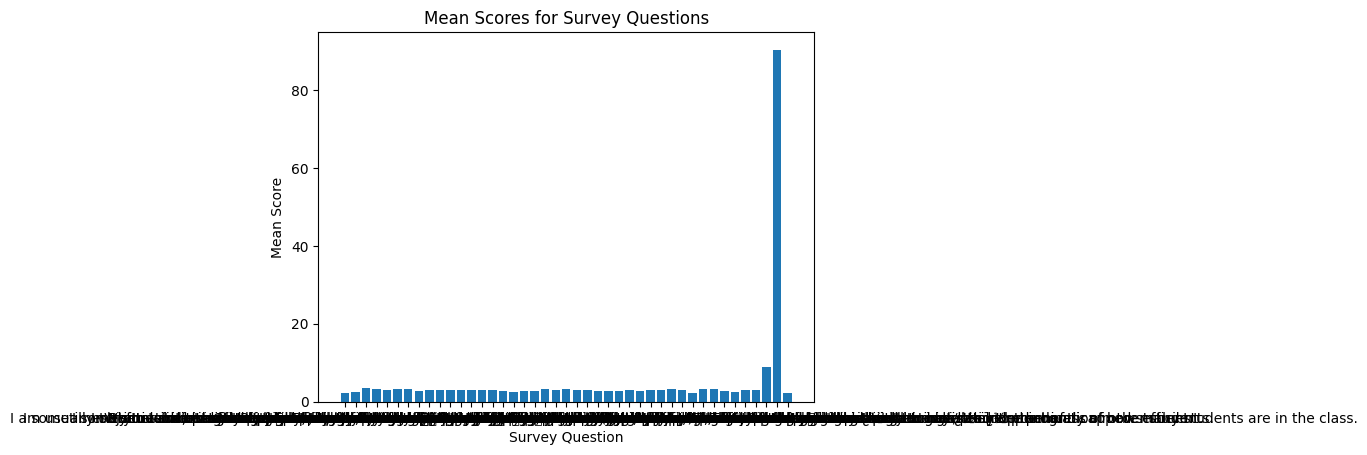

In [ ]:
# calculate the mean score for each survey question
mean_scores = df.mean()[2:-5]

# create a bar chart
plt.bar(mean_scores.index, mean_scores)

# set the plot title and axis labels
plt.title('Mean Scores for Survey Questions')
plt.xlabel('Survey Question')
plt.ylabel('Mean Score')

# display the plot
plt.show()

In [ ]:
#Merge all fixation features 

merged_fixation = pd.concat([fixation_period,encode_duration], axis=1)
merged_fixation.drop(columns=['Period_codes', 'Period'], inplace=True)


In [ ]:
#Group fixation features by Participant name and Recording name
mean_fixation=merged_fixation.groupby(['Participant name','Recording name']).mean().rename(columns={'Duration':'mean duration',
                                                                                                    'short':'mean short',
                                                                                                   'medium':'mean medium',
                                                                                                   'long':'mean long'})


std_fixation=merged_fixation.groupby(['Participant name','Recording name']).std().rename(columns={'Duration':'std duration',
                                                                                                    'short':'std short',
                                                                                                   'medium':'std medium',
                                                                                                   'long':'std long'})

merged_df_fixation = pd.concat([mean_fixation,std_fixation], axis=1)



In [ ]:
#find the saccade count
saccade_counts = {}

for record, data in eye_movement.groupby(['Participant name','Recording name']):
    saccade_count = 0
    prev_movement_type = None
    for idx, row in data.iterrows():
        if prev_movement_type == 'Fixation' and row['Eye movement type'] == 'Saccade':
            saccade_count += 1
        prev_movement_type = row['Eye movement type']
    saccade_counts[record] = saccade_count

df_saccade = pd.DataFrame.from_dict(saccade_counts, orient='index', columns=['Saccade Count']).reset_index()
df_saccade[['Participant name', 'Recording name']] = pd.DataFrame(df_saccade['index'].tolist(), index=df_saccade.index)
df_saccade = df_saccade.drop('index', axis=1).set_index(['Participant name','Recording name'])



In [ ]:
df_saccade

Saccade Count
Participant name Recording name               
Participant0001  Recording6                418
                 Recording7                263
                 Recording8                119
Participant0003  Recording9                154
Participant0011  Recording48                75
                 Recording49                46
Participant0052  Recording2                117
                 Recording4                134
Participant0060  Recording2                128
                 Recording4                119

In [ ]:
X_data=pd.concat([merged_df_pupil,merged_df_fixation,df_saccade],axis=1).reset_index()
X_data

,Participant name,Recording name,mean diff rt.pupil,mean diff lt.pupil,max diff rt.pupil,max diff lt.pupil,std diff rt.pupil,std diff lt.pupil,mean duration,mean short,mean medium,std duration,std short,std medium,Saccade Count
0,Participant0001,Recording6,0.077131,0.069474,0.76,0.58,0.071722,0.064156,36.734118,0.990588,0.009412,28.767733,0.096670,0.096670,418
1,Participant0001,Recording7,0.068975,0.060100,0.84,0.87,0.070558,0.059677,43.973881,0.988806,0.011194,31.278190,0.105405,0.105405,263
2,Participant0001,Recording8,0.094078,0.058449,0.99,0.59,0.097950,0.051398,40.308333,1.000000,0.000000,26.754029,0.000000,0.000000,119
3,Participant0003,Recording9,0.086561,0.104546,0.65,0.82,0.087588,0.095990,30.192547,0.975309,0.024691,32.982479,0.155664,0.155664,154
4,Participant0011,Recording48,0.481808,0.483785,3.43,2.40,0.702583,0.497680,19.354167,1.000000,0.000000,19.210453,0.000000,0.000000,75
5,Participant0011,Recording49,0.312075,0.446604,1.81,2.46,0.357291,0.518369,29.969697,0.984848,0.015152,35.326159,0.123091,0.123091,46
6,Participant0052,Recording2,0.099521,0.128944,0.96,1.48,0.132847,0.169040,31.629630,1.000000,0.000000,19.810950,0.000000,0.000000,117
7,Participant0052,Recording4,0.096088,0.109351,0.92,1.13,0.120988,0.134304,32.337931,1.000000,0.000000,19.088326,0.000000,0.000000,134
8,Participant0060,Recording2,0.039602,0.032798,0.67,0.57,0.056563,0.053477,39.958042,1.000000,0.000000,22.545064,0.000000,0.000000,128
9,Participant0060,Recording4,0.063589,0.048729,1.23,1.15,0.090931,0.088628,40.645161,0.980645,0.019355,32.326408,0.138215,0.138215,119


In [ ]:
print(len(X_data['Participant name'].unique())) # prints the length of the Participant name array
print(len(data3['Total Score original'].values)) # prints the length of the Total Score original array
print(len(data3['Total Score extended'].values)) # prints the length of the Total Score extended array

5
5
5


In [ ]:
#Choose total score to be target
score=pd.DataFrame({'Participant name':X_data['Participant name'].unique(),
            'Score_original':data3['Total Score original'],
            'Score_extended':data3['Total Score extended']})

In [ ]:
data3

,Participant nr,NR,Created,Modified,I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate,I want to participate.,I sometimes find it difficult to see things from the other guys point of view.,"I am usually objective when I watch a film or play, and I dont often get completely caught up in it.",I try to look at everybodys side of a disagreement before I make a decision.,I sometimes try to understand my friends better by imagining how things look from their perspective.,...,I feel left out (or excluded) when I cannot participate in a conversation.,Total Score extended,Total Score original,Elapsed time,I sometimes find it difficult to see things from the ï¿½other guyï¿½sï¿½ point of,"I am usually objective when I watch a film or play, and I donï¿½t often get completely caught up in i",I try to look at everybodyï¿½s side of a disagreement before I make a decisio,"When I am upset at someone, I usually try to ï¿½put myself in his shoes for a whil",I often get emotionally involved with my friendsï¿½ problem,"I feel impatient when people communicate slowly, so I complete other peopleï¿½s sentences to make the communication more efficien"
0,1,9199452,07.09.2020 15:13,07.09.2020 15:13,Yes,Proceed,3.0,3.0,4.0,4,...,4,134,108,5 minutes 5 seconds,NaN,NaN,NaN,NaN,NaN,NaN
1,2,9584002,30.09.2020 11:23,30.09.2020 11:23,Yes,Proceed,3.0,3.0,4.0,4,...,2,133,105,5 minutes 55 seconds,NaN,NaN,NaN,NaN,NaN,NaN
2,3,9112363,02.09.2020 09:17,02.09.2020 09:17,Yes,Proceed,2.0,2.0,3.0,4,...,3,116,81,6 minutes 49 seconds,NaN,NaN,NaN,NaN,NaN,NaN
3,4,9727754,06.10.2020 13:20,06.10.2020 13:20,Yes,Proceed,2.0,3.0,4.0,3,...,2,114,96,8 minutes 39 seconds,NaN,NaN,NaN,NaN,NaN,NaN
4,5,9730232,06.10.2020 14:53,06.10.2020 14:53,Yes,Proceed,3.0,3.0,4.0,4,...,4,138,106,7 minutes 27 seconds,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data= pd.merge(X_data, score, on='Participant name')

In [ ]:
data3

,Participant nr,NR,I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate,I want to participate.,I sometimes find it difficult to see things from the other guys point of view.,"I am usually objective when I watch a film or play, and I dont often get completely caught up in it.",I try to look at everybodys side of a disagreement before I make a decision.,I sometimes try to understand my friends better by imagining how things look from their perspective.,"When I am upset at someone, I usually try to put myself in his shoes for a while.","Before criticising somebody, I try to imagine how I would feel if I was in their place.",...,I feel left out (or excluded) when I cannot participate in a conversation.,Total Score extended,Total Score original,Elapsed time,I sometimes find it difficult to see things from the ï¿½other guyï¿½sï¿½ point of,"I am usually objective when I watch a film or play, and I donï¿½t often get completely caught up in i",I try to look at everybodyï¿½s side of a disagreement before I make a decisio,"When I am upset at someone, I usually try to ï¿½put myself in his shoes for a whil",I often get emotionally involved with my friendsï¿½ problem,"I feel impatient when people communicate slowly, so I complete other peopleï¿½s sentences to make the communication more efficien"


In [ ]:

# drop all rows containing at least one NaN value
data = data.dropna()

print(data)

Empty DataFrame
Columns: [Participant nr, NR, Created, Modified, I have read and understood the information about the study and all the information in this form is explained to me and I am willing to participate, I want to participate., I sometimes find it difficult to see things from the other guys point of view., I am usually objective when I watch a film or play, and I dont often get completely caught up in it., I try to look at everybodys side of a disagreement before I make a decision., I sometimes try to understand my friends better by imagining how things look from their perspective., When I am upset at someone, I usually try to put myself in his shoes for a while., Before criticising somebody, I try to imagine how I would feel if I was in their place., I often get emotionally involved with my friends problems., I am inclined to get nervous when others around me seem to be nervous., People I am with have a strong influence on my mood., It affects me very much when one of 

In [ ]:
import pandas as pd

# Read in the data
data = pd.read_csv("/content/new_file2.csv")

# Keep only the first five rows
data = data.head(5)

# Save the updated dataset to a new CSV file
data.to_csv("new_data2.csv", index=False)

In [ ]:

X = data.drop(['Participant nr', 'Total Score original', 'Total Score extended'], axis=1).fillna(0) 

y = data['Total Score extended']

In [ ]:
X = data3.drop(['Participant nr', 'Total Score original', 'Total Score extended'], axis=1).fillna(0) 

y = data3['Total Score extended']

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score as acc

dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X, y)
print("Dummy ACC: %.2f" % acc(y, dummy_clf.predict(X)))


Dummy ACC: 0.20


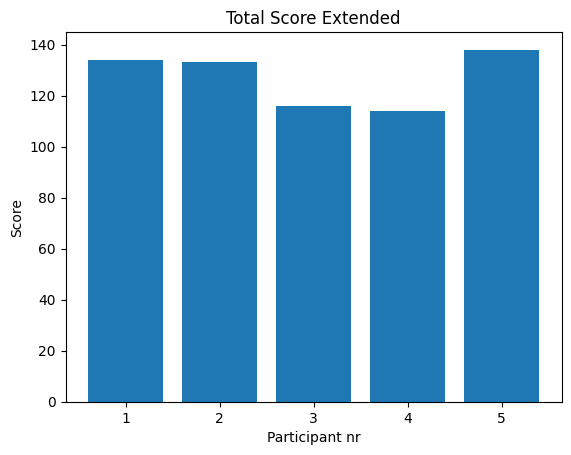

In [ ]:

# create a bar graph of the Total Score extended column
plt.bar(data["Participant nr"], data["Total Score extended"])
plt.title("Total Score Extended")
plt.xlabel("Participant nr")
plt.ylabel("Score")
plt.show()

In [ ]:
data3["Created"] = pd.to_datetime(data3["Created"])

# Set the "Created" column as the index
data3 = data3.set_index("Created")

# Plot the Total Score extended column over time
plt.plot(data3["Total Score extended"])
plt.xlabel("Date")
plt.ylabel("Total Score extended")
plt.show()

In [ ]:
# Let's see the feature importances for our classifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
model_rf=rf.fit(X, y)
rf_score = cross_val_score(model_rf, X, y, cv=10, scoring=make_scorer(acc))
print("Random forest ACC:%.2f +/- %.2f"%(rf_score.mean(),rf_score.std()))

importances = rf.feature_importances_
std = np.std([rf.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure(figsize=(15,5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="green", yerr=std[indices])
plt.xticks(range(X_train.shape[1]), np.array(X_train.columns)[indices])
plt.xlim([-1, X.shape[1]])
plt.ylim([0, None])
plt.xticks(rotation=90)
plt.savefig('Feature ranking')




ValueError: ignored

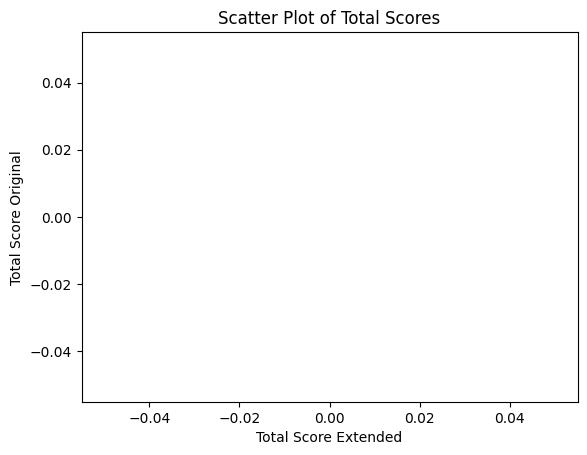

In [ ]:
# plot the scatter plot
plt.scatter(data3['Total Score extended'], data3['Total Score original'])
plt.title('Scatter Plot of Total Scores')
plt.xlabel('Total Score Extended')
plt.ylabel('Total Score Original')
plt.show()